# Proyek Analisis Data: E-commerce Public Dataset
- **Nama:** Virna Dalira Br Sebayang 
- **Email:** virnadalira@gmail.com
- **ID Dicoding:** pearnads

## Menentukan Pertanyaan Bisnis
1. Bagaimana Performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
2. Produk apa yang paling banyak dan paling sedikit terjual ?
3. RFM ANALYSIS

## Import Semua Packages/Library yang Digunakan

In [2]:
# untuk menginstall kaggle
!pip install kaggle 

In [3]:
# untuk melihat dataset yang akan didownload sesuai dengan nama file yang sudah ditentukan
!kaggle datasets list -s "Brazilian E-Commerce Public Dataset by Olist" 

ref                                                     title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
olistbr/brazilian-ecommerce                             Brazilian E-Commerce Public Dataset by Olist       43MB  2021-10-01 19:08:27         231466       3063  1.0              
olistbr/marketing-funnel-olist                          Marketing Funnel by Olist                         278KB  2018-11-16 14:00:20          12704        275  1.0              
b'gustavofelici/oliststar-boosting-customer-satisfaction  \xe2\x9c\xa8 OlistStar: Boosting Customer Satisfaction! \xf0\x9f\x92\xaf\xf0\x9f\x8e\xaf     3MB  2023-06-18 14:38:09             72          7  1.0              '
fredericods/ptbr-sentiment-analysis-datasets            Brazilian 

In [4]:
# untuk mendownload dataset e-commerce sesuai file dalam pilihan instruksi tugas
!kaggle datasets download -d "olistbr/brazilian-ecommerce" 

brazilian-ecommerce.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**1. Memuat tabel customers**

In [6]:
customers = pd.read_csv("olist_customers_dataset.csv")
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**2. Memuat tabel orders**

In [7]:
orders = pd.read_csv("olist_orders_dataset.csv")
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**3. Memuat tabel Products**

In [8]:
products = pd.read_csv("olist_products_dataset.csv")
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**4. Memuat tabel Order items**

In [9]:
order_items = pd.read_csv("olist_order_items_dataset.csv")
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**5. Memuat tabel Order payments**

In [10]:
order_payments = pd.read_csv("olist_order_payments_dataset.csv")
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**6. Memuat tabel Order Reviews**

In [11]:
order_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**7. Memuat tabel sellers**

In [12]:
sellers = pd.read_csv("olist_sellers_dataset.csv")
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**8. Memuat tabel geolocation**

In [13]:
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**9. Memuat tabel Category Name Translation**

In [14]:
product_category_name_translation = pd.read_csv("product_category_name_translation.csv")
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

**Menilai data**
- memeriksa tipe data data dari tiap kolom
- menampilkan informasi terkait jumlah missing values yang terdapat dalam setiap kolom
- menampilkan jumlah duplikasi dari tiap tiap data

In [15]:
for df in [customers, geolocation, order_items, order_payments, order_reviews, orders, products, sellers]:
    print("info tabel : ","\n")
    print(df.info(),"\n")
    print("Missing value : ","\n")
    print(df.isna().sum(),"\n")
    print("Jumlah duplikasi: ", df.duplicated().sum(), "\n","\n")

info tabel :  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None 

Missing value :  

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64 

Jumlah duplikasi:  0 
 

info tabel :  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       ----------

Dapat dilihat bahwa data selain geolocation tidak memiliki duplikasi, sedangkan data geolocation memiliki 261831 duplikasi data.
Kemudian dapat diperhatikan pada data order reviews terdapat 87656 missing values pada comment title dan  58247 missing values pada comment message dan beberapa missing values pada order approved at, delivered carrier date dan delivered customer date.
Pada data products, terdapat masing-masing 610 missing values pada product category name, name lenght, product description lenght dan photos quantity.
Terdapat masing-masing 2 missing values pada product weight, length, height dan width

### Cleaning Data

#### Menghilangkan duplikasi data pada tiap tiap tabel (dataframe)

In [16]:
for df in [customers, geolocation, order_items, order_payments, order_reviews, orders, products, sellers]:
    df.drop_duplicates(inplace=True)
    print("Jumlah duplikasi :",df.duplicated().sum(),"\n")

Jumlah duplikasi : 0 

Jumlah duplikasi : 0 

Jumlah duplikasi : 0 

Jumlah duplikasi : 0 

Jumlah duplikasi : 0 

Jumlah duplikasi : 0 

Jumlah duplikasi : 0 

Jumlah duplikasi : 0 



Berdasarkan output di atas, duplikasi pada tiap data sudah diatasi (dihapus)

#### Mengatasi missing value pada review table

In [17]:
order_reviews[order_reviews.review_comment_title.isna()]
order_reviews.review_comment_title.value_counts()
order_reviews.fillna({"review_comment_title" : "No Title"}, inplace=True)
order_reviews.fillna({"review_comment_message" : "No Comment Message"}, inplace=True)
order_reviews.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Berdasarkan output di atas, diperoleh missing value dari order reviews sudah diatasi.

#### Melihat apakah ada missing value pada orders

In [18]:
orders[orders.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


Berdasarkan output di atas, missing value pada orders terjadi karena order_status canceled (pesanan dibatalkan) sehingga akan dihapus order yang berstatus canceled

#### Mengatasi missing value pada orders

In [19]:
# Menghapus baris yang mengandung missing value pada beberapa kolom
orders.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)

In [20]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


#### Memeriksa missing value pada products

In [21]:
products[products.product_category_name.isna()]
products.product_category_name.value_counts()
products.fillna({"product_category_name" : "No Specified Category Name"}, inplace=True)
products.fillna({"product_name_lenght" : "No Specified Category Name"}, inplace=True)
products.fillna({"product_description_lenght" : "No Specified Category Name"}, inplace=True)
products[products.product_weight_g.isna()]
products.fillna({"product_photos_qty	" : "No Specified"}, inplace=True)
products.fillna({"product_weight_g" : "No Specified"}, inplace=True)
products.fillna({"product_length_cm	" : "No Specified"}, inplace=True)
products.fillna({"product_height_cm" : "No Specified"}, inplace=True)
products.fillna({"product_width_cm" : "No Specified"}, inplace=True)

Dengan sintaks di atas maka missing value pada products sudah diatasi dengan menambahkan keterangan pada tiap value yang memiliki nilai NaN

## Exploratory Data Analysis (EDA)

### Explore data customers

Pertama, akan dieksplorasi data customers terlebih dahulu. Dataset ini memuat berbagai informasi terkait customer, seperti "customer_id","customer_unique_id","customer_zip_code_prefix","customer_city","customer_state"

Sebagai permulaan,akan dilihat rangkuman parameter statistik dari data customers_df menggunakan method describe().

In [22]:
customers.describe(include = "all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Berdasarkan rangkuman parameter statistik di atas dapat diperoleh sejumlah informasi salah satunya yaitu kebanyakan dari pelanggan berasal dari kota sao paulo

Selanjutnya melihat demografi pelanggan berdasarkan kota dan negara bagian (state) 

In [23]:
customers.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [24]:
customers.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

Berdasarkan hasil di atas, dapat dilihat bahwa persebaran pelanggan pada e-commerce ini tidak begitu merata, terdapat perbedaan jumlah yang sangat signifikan pada setiap kota dan negara bagian. Pelanggan e-commerce paling banyak berada di kota Sao Paulo dengan jumlah pelanggan mencapai 15540. Selain itu, pelanggan e-commerce paling banyak berasal dari negara bagian SP.

### Explore data orders

Data kedua yang akan dieksplor adalah orders. Ia mengandung berbagai informasi terkait sebuah order yang terdiri dari "order_id","customer_id","order_status","order_purchase_timestamp","order_approved_at",
"order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date". Berdasarkan informasi tersebut, kita bisa membuat sebuah kolom baru untuk memuat waktu pengiriman tiap order. Untuk melakukannya, kita perlu menghitung selisih antar delivery_date dan order_date serta menyimpannya sebagai delivery_time.

In [25]:
# Menghapus baris dengan nilai "Canceled" pada kolom order_delivered_customer_date
orders = orders[orders['order_delivered_customer_date'] != 'Canceled']
# Menghitung  waktu antara pembelian dan penerimaan barang oleh customer
# konversi 'order_purchase_timestamp' dan 'order_delivered_customer_date' ke datetime 
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
delivery_time = orders["order_delivered_customer_date"] - orders["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders["delivery_time"] = round(delivery_time/86400)
orders.describe(include = "all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,96461,96461,96461,96461,96461,96461,96461,96461,96461.000000
unique,96461,96461,2,NaN,88272,80100,NaN,445,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,2018-02-27 04:31:10,2018-05-09 15:48:00,NaN,2017-12-20 00:00:00,NaN
freq,1,1,96455,NaN,9,47,NaN,507,NaN
mean,NaN,NaN,NaN,2018-01-01 23:53:26.642249216,NaN,NaN,2018-01-14 13:17:13.228102400,NaN,12.517007
min,NaN,NaN,NaN,2016-09-15 12:16:38,NaN,NaN,2016-10-11 13:46:32,NaN,1.000000
25%,NaN,NaN,NaN,2017-09-14 09:28:28,NaN,NaN,2017-09-25 22:31:59,NaN,7.000000
50%,NaN,NaN,NaN,2018-01-20 19:59:42,NaN,NaN,2018-02-02 19:50:56,NaN,10.000000
75%,NaN,NaN,NaN,2018-05-05 18:33:24,NaN,NaN,2018-05-15 23:08:54,NaN,16.000000
max,NaN,NaN,NaN,2018-08-29 15:00:37,NaN,NaN,2018-10-17 13:22:46,NaN,210.000000


Berdasarkan hasil tersebut, dapat diketahui bahwa rata-rata waktu pengiriman sebesar 12 atau 13 hari dengan nilai maksimum sebesar 210 hari dan nilai minimum sebesar 1 hari. 

In [26]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,14.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,3.0
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,8.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,22.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,25.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,17.0


### Explore data orders dan customers

pada data orders terdapat kolom yang berisi informasi terkait customer id pelanggan yang pernah melakukan order. Informasi ini bisa digunakan untuk mengidentifikasi pelanggan yang belum pernah melakukan order. Untuk melakukan hal ini, kita buat sebuah kolom baru bernama “status” pada data customers. Kolom tersebut memiliki nilai “Active” untuk pelanggan yang pernah melakukan order setidaknya sekali dan sebaliknya bernilai “Non Active” untuk pelanggan yang belum pernah melakukan order sama sekali. Berikut merupakan kode untuk melakukannya

In [27]:
customer_id_in_orders =  orders.customer_id.tolist()
customers["status"] = customers["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders else "Non Active")
customers.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
98066,5487e6c4f3ddd99d5e210f183505d974,121b5a0ae9d09a2ca5e8090fd2a00a58,27130,barra do pirai,RJ,Active
60415,1e41f525df3cf1c0195fae7dec1e2a7b,a3ee644cb214e4693a98e7dbb1cebff7,20520,rio de janeiro,RJ,Active
59505,98633d385a625996e77868705db2169f,7f35a871b3a7a11a8cec451cbda0edcb,27933,macae,RJ,Active
15389,24541b677bb53f2a9ce4c5f8adb74284,43f9d5ace80c6d3c5c09544bc2fa8484,12091,taubate,SP,Active
6100,cefab390926b6fc3de3ca94c82ebb1ba,bf635aadfff238fd7e9b0d25e800d019,5171,sao paulo,SP,Active


In [28]:
# Mengambil data customer yang memiliki status "Non Active"
non_active_customers = customers[customers["status"] == "Non Active"]

# Menampilkan hasil
print(non_active_customers.head())

                          customer_id                customer_unique_id  \
46   f34a6e874087ec1f0e3dab9fdf659c5d  233896de79986082f1f479f1f85281cb   
47   c132855c926907970dcf6f2bf0b33a24  a8ae36a2bb6c2bbc3b5d62ede131c9ef   
70   4c7241af24b5344cb01fe687643de4fe  b157c176c3fe04914fde33f2dc8b878a   
79   f6529ffebe6b3440d45d89604a4239ac  e5dbefdfdf3eff75c8e6cd655f128279   
100  ae76a4650235ab18764708174f1da31e  2b6082a140c439e2df870c85b0aa5e88   

     customer_zip_code_prefix customer_city customer_state      status  
46                      38300     ituiutaba             MG  Non Active  
47                      18740   taquarituba             SP  Non Active  
70                      60336     fortaleza             CE  Non Active  
79                      26272   nova iguacu             RJ  Non Active  
100                      2983     sao paulo             SP  Non Active  


Untuk memperoleh informasi terkait jumlah pelanggan yang berstatus “Active” dan “Non Active”, kita bisa menggunakan pivot table. Berikut contoh kode untuk membuat pivot table menggunakan kolom “status”.

In [29]:
customers.groupby(by="status").customer_id.count()

status
Active        96461
Non Active     2980
Name: customer_id, dtype: int64

Untuk memperoleh lebih banyak informasi terkait kedua data tersebut, kita perlu menggabungkan keduanya melalui proses join atau merge. Berikut merupakan contoh kode untuk melakukan merge terhadap data orders dan customers.

In [30]:
orders_customers = pd.merge(
    left=orders,
    right=customers,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,14.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,3.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


**Jumlah order berdasarkan kota**

In [31]:
orders_customers.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15044
1,rio de janeiro,6603
2,belo horizonte,2697
3,brasilia,2071
4,curitiba,1489
5,campinas,1406
6,porto alegre,1341
7,salvador,1188
8,guarulhos,1143
9,sao bernardo do campo,911


Nah, berdasarkan hasil tersebut,sama halnya seperti kota dengan customer terbanyak diketahui bahwa kota sao paulo dan rio de janeiro merupakan dua kota yang memiliki jumlah order terbanyak.

#### Mengurutkan kategori produk dengan pendapatan tertinggi 

In [32]:
orders_customers_item = pd.merge(
    left=order_items,
    right= orders_customers,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_customers_item

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,8.0,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ,Active
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,16.0,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP,Active
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,8.0,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG,Active
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,6.0,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP,Active
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,25.0,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00,17.0,0c9aeda10a71f369396d0c04dce13a64,65077.0,sao luis,MA,Active
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00,9.0,0da9fe112eae0c74d3ba1fe16de0988b,81690.0,curitiba,PR,Active
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00,5.0,cd79b407828f02fdbba457111c38e4c4,4039.0,sao paulo,SP,Active
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00,2.0,eb803377c9315b564bdedad672039306,13289.0,vinhedo,SP,Active


In [33]:
# Menggabungkan DataFrame orders_customers_item dengan products
merged_data = pd.merge(
    left=orders_customers_item,
    right=products,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

# Menghitung total pendapatan untuk setiap kategori produk
category_revenue = merged_data.groupby('product_category_name')['price'].sum().reset_index()

# Menyusun hasil secara menurun berdasarkan total pendapatan
sorted_category_revenue = category_revenue.sort_values(by='price', ascending=False)

# Menampilkan hasil
print("Kategori Produk dengan Pendapatan Tertinggi:")
print(sorted_category_revenue.head(10))

Kategori Produk dengan Pendapatan Tertinggi:
     product_category_name       price
12            beleza_saude  1258681.34
67      relogios_presentes  1205005.68
14         cama_mesa_banho  1036988.68
33           esporte_lazer   988048.97
45  informatica_acessorios   911954.32
55        moveis_decoracao   729762.49
27              cool_stuff   635290.85
73   utilidades_domesticas   632248.66
9               automotivo   592720.11
41      ferramentas_jardim   485256.46


Berdasarkan pivot table tersebut, diketahui bahwa produk beleza_saude merupakan produk yang paling laris dan juga paling banyak menyumbang revenue terhadap perusahaan.  

#### Mengurutkan kota dengan pendapatan tertinggi 

In [34]:
# Menghitung total pendapatan untuk setiap kota
city_revenue = merged_data.groupby('customer_city')['price'].sum().reset_index()

# Menyusun hasil secara menurun berdasarkan total pendapatan
sorted_city_revenue = city_revenue.sort_values(by='price', ascending=False)

# Menampilkan hasil
print("Kota dengan Pendapatan Tertinggi:")
print(sorted_city_revenue.head())

Kota dengan Pendapatan Tertinggi:
       customer_city       price
3563       sao paulo  1859466.84
3126  rio de janeiro   955847.36
449   belo horizonte   346039.04
553         brasilia   295814.72
1135        curitiba   205999.33


#### Membuat all_data ( menyatukan data-data yang sudah dibersihkan)

In [36]:
all_data = pd.merge(
    left=merged_data,
    right= order_reviews,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
print(merged_data.head())

                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  \
0  2017-09-19 09:45:35   58.90          13.29   
1  2017-05-03 11:05:13  239.90          19.93   
2  2018-01-18 14:48:30  199.00          17.87   
3  2018-08-15 10:10:18   12.99          

## Visualization & Explanatory Analysis

### Bagaimana Performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir? : 

In [38]:
monthly_orders = all_data.resample(rule='ME', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders.index = monthly_orders.index.strftime('%Y-%m')
monthly_orders = monthly_orders.reset_index()
monthly_orders.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)
monthly_orders.head()

,order_purchase_timestamp,order_count,revenue
0,2016-09,1,134.97
1,2016-10,270,41321.37
2,2016-11,0,0.00
3,2016-12,1,10.90
4,2017-01,748,114347.00


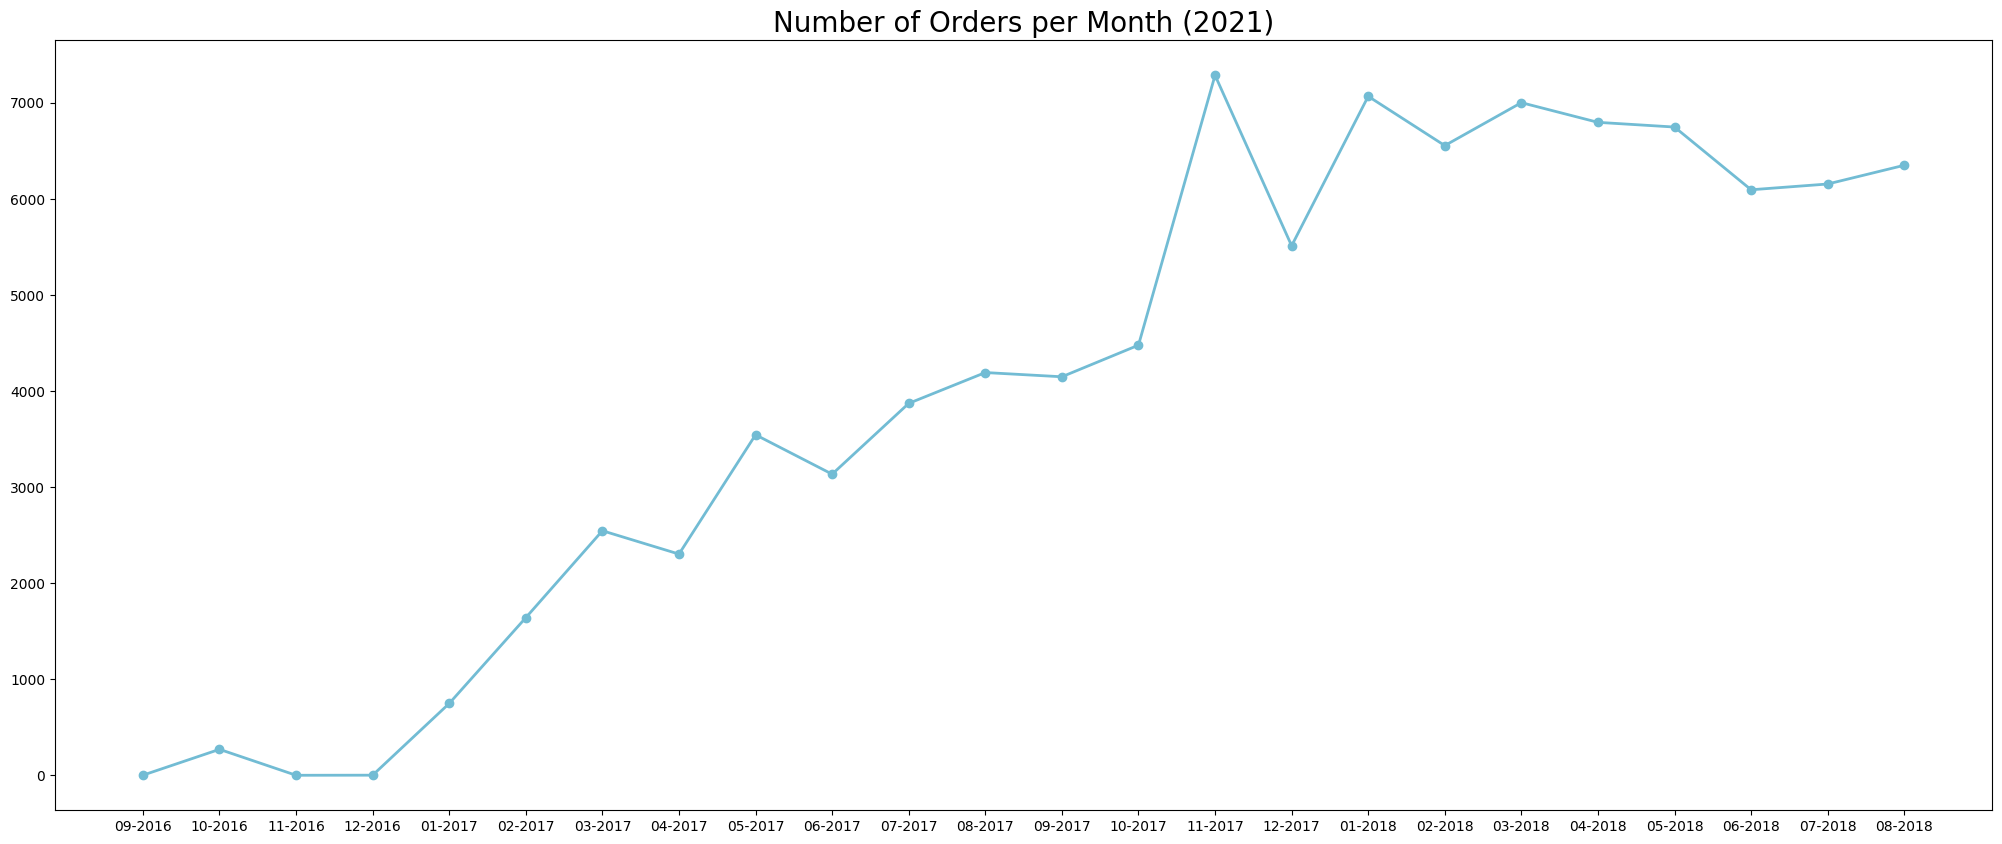

In [53]:
monthly_orders = all_data.resample(rule='ME', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders.index = monthly_orders.index.strftime('%m-%Y') #mengubah format order date menjadi nama bulan
 
monthly_orders = monthly_orders.reset_index()
monthly_orders.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)
 
plt.figure(figsize=(25, 10)) 
plt.plot(monthly_orders["order_purchase_timestamp"], monthly_orders["order_count"], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Number of Orders per Month (2021)", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

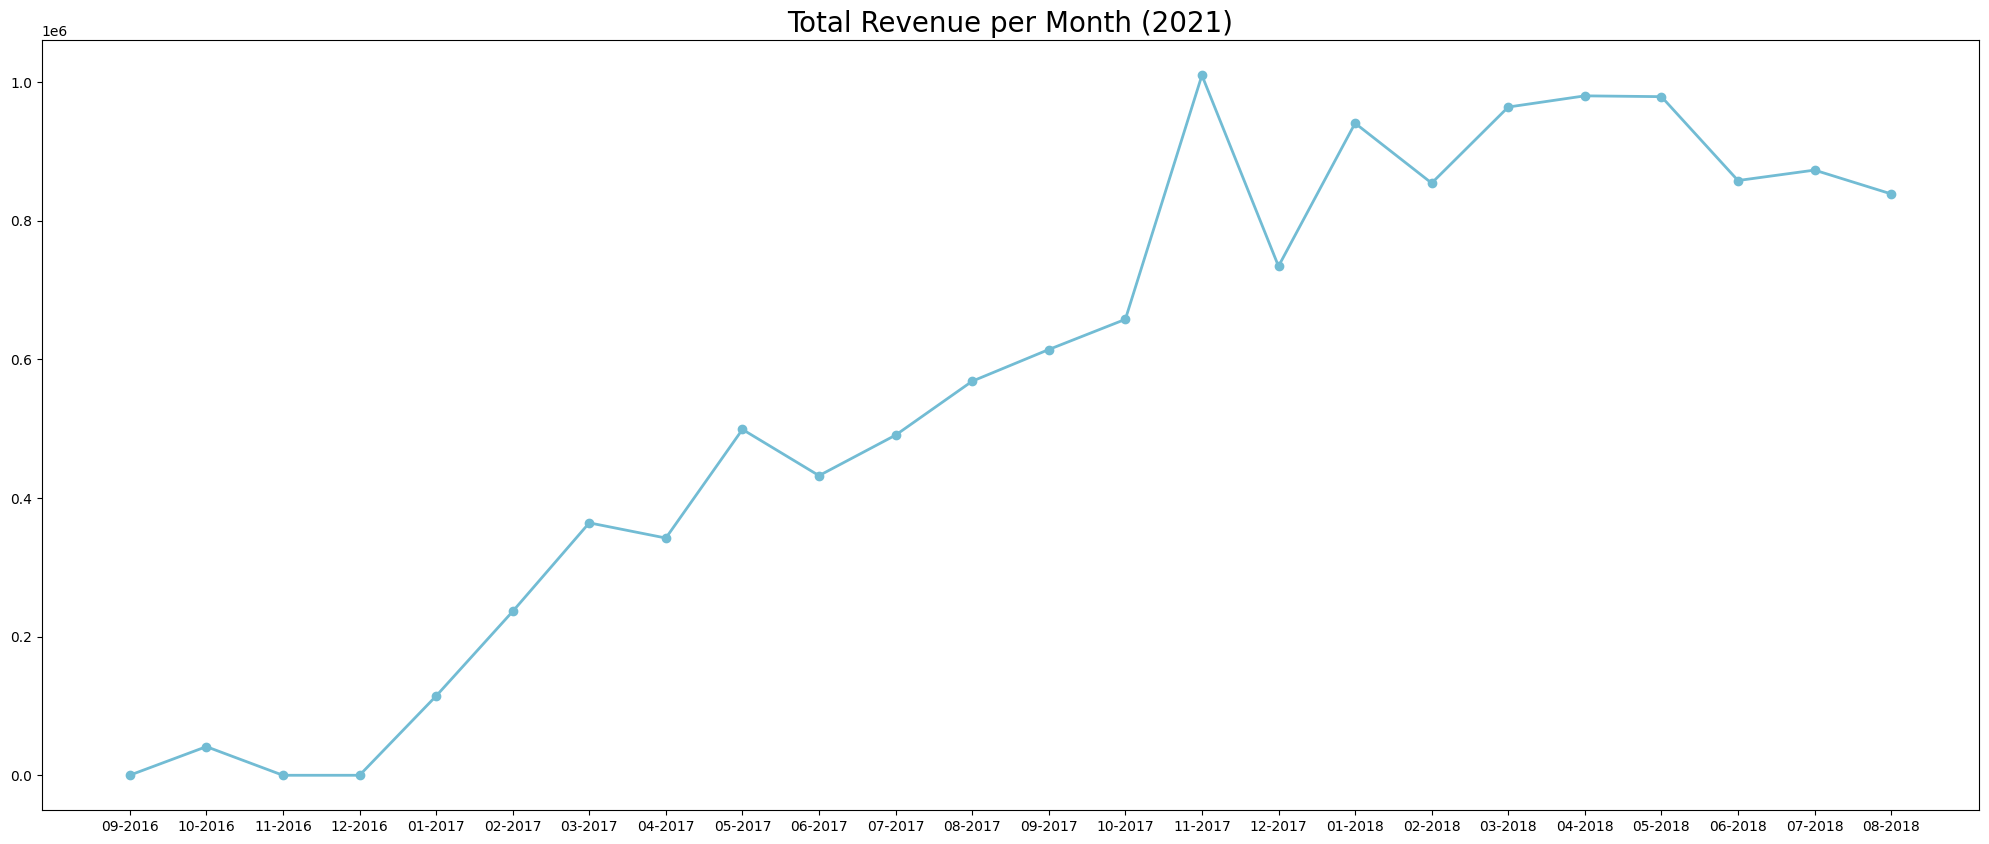

In [55]:
plt.figure(figsize=(25, 10))
plt.plot(
    monthly_orders["order_purchase_timestamp"],
    monthly_orders["revenue"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month (2021)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Produk apa yang paling banyak dan paling sedikit terjual ? : 

In [56]:
sum_order_items = all_data.groupby("product_category_name").order_item_id.sum().sort_values(ascending=False).reset_index()
sum_order_items.head(15)

,product_category_name,order_item_id
0,cama_mesa_banho,14403
1,moveis_decoracao,11909
2,beleza_saude,11260
3,esporte_lazer,10151
4,informatica_acessorios,10129
5,utilidades_domesticas,9138
6,relogios_presentes,6624
7,ferramentas_jardim,5937
8,telefonia,5176
9,automotivo,4956


C:\Users\Xyn7\AppData\Local\Temp\ipykernel_7624\2402321646.py:11: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1], hue = "order_item_id")


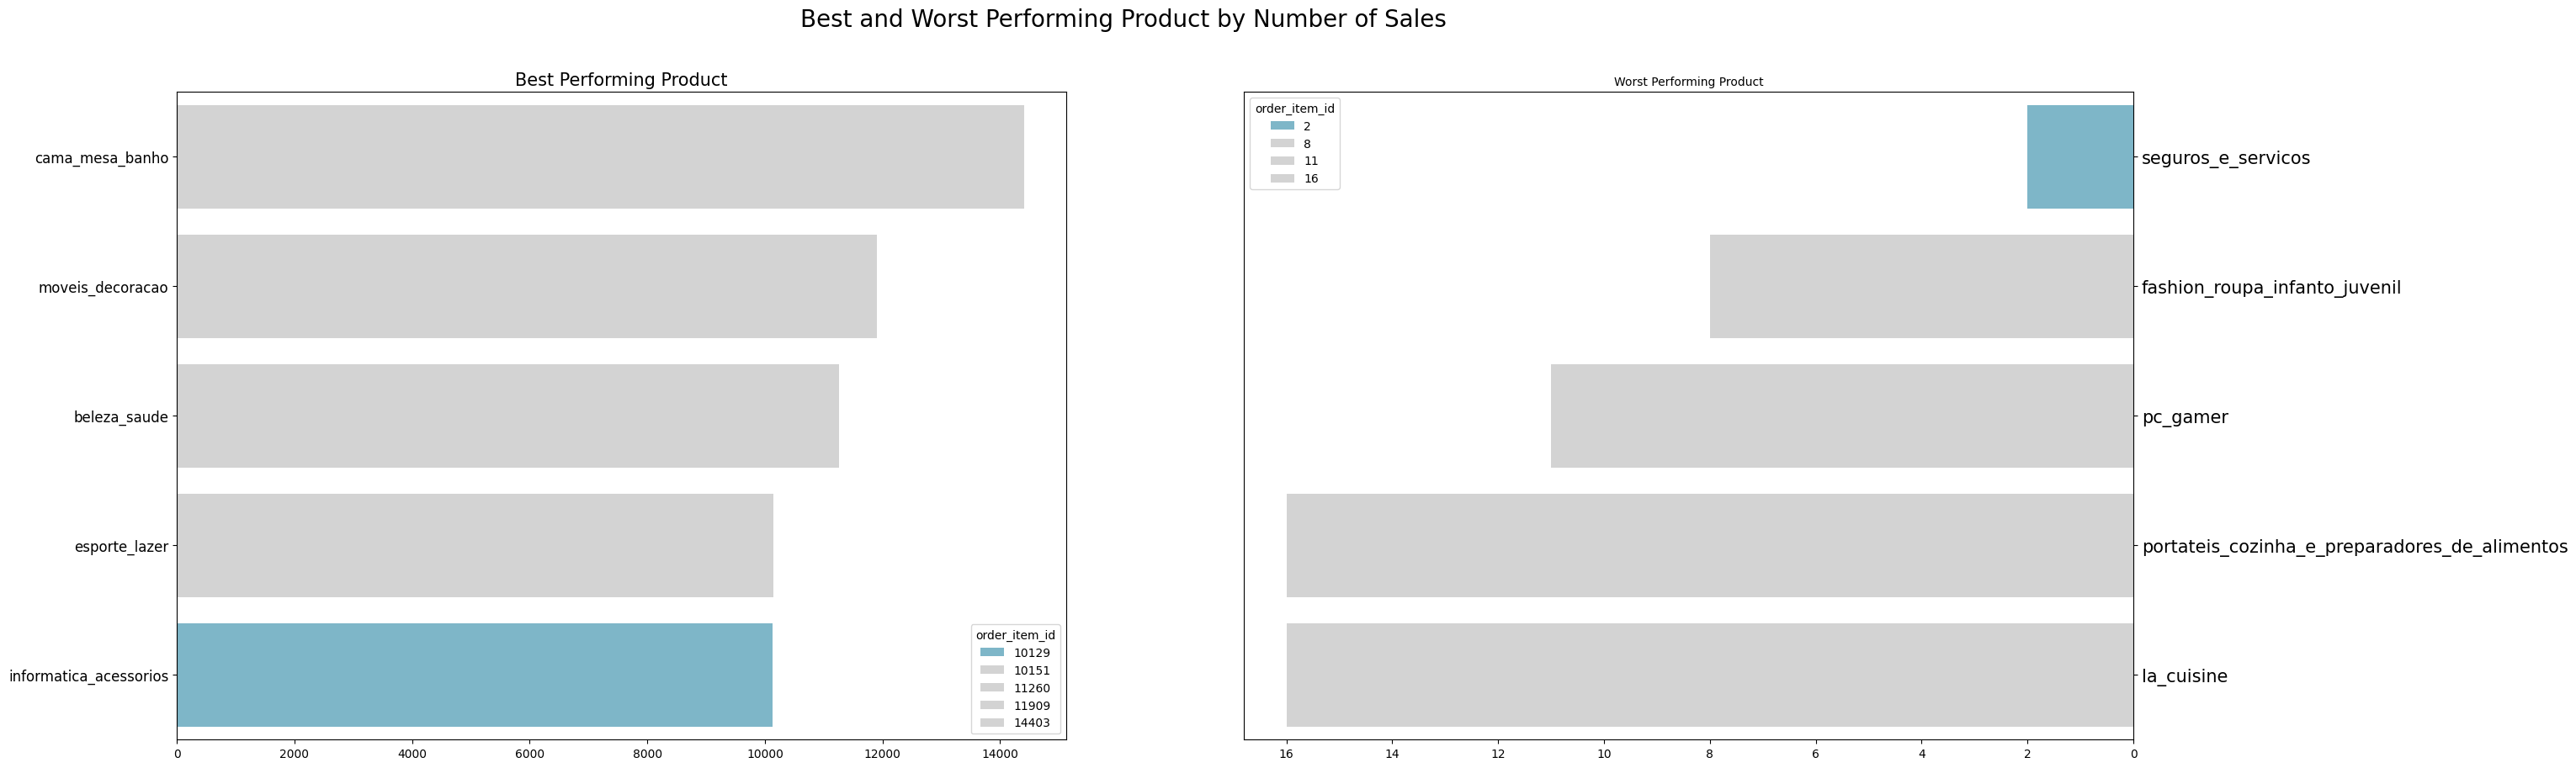

In [72]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 10))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items.head(5), palette=colors, ax=ax[0], hue = "order_item_id")
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1], hue = "order_item_id")
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=10)
ax[1].tick_params(axis='y', labelsize=15)
 
plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

#### RFM Analysis

In [64]:
rfm_df = all_data.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
 
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288
1,000161a058600d5901f007fab4c27140,1,54.90,409
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,547
3,0002414f95344307404f0ace7a26f1d5,1,149.90,378
4,000379cdec625522490c315e70c7a9fb,1,93.00,149


C:\Users\Xyn7\AppData\Local\Temp\ipykernel_7624\2938533665.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\Xyn7\AppData\Local\Temp\ipykernel_7624\2938533665.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')  # Memiringkan label
C:\Users\Xyn7\AppData\Local\Temp\ipykernel_7624\2938533665.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequen

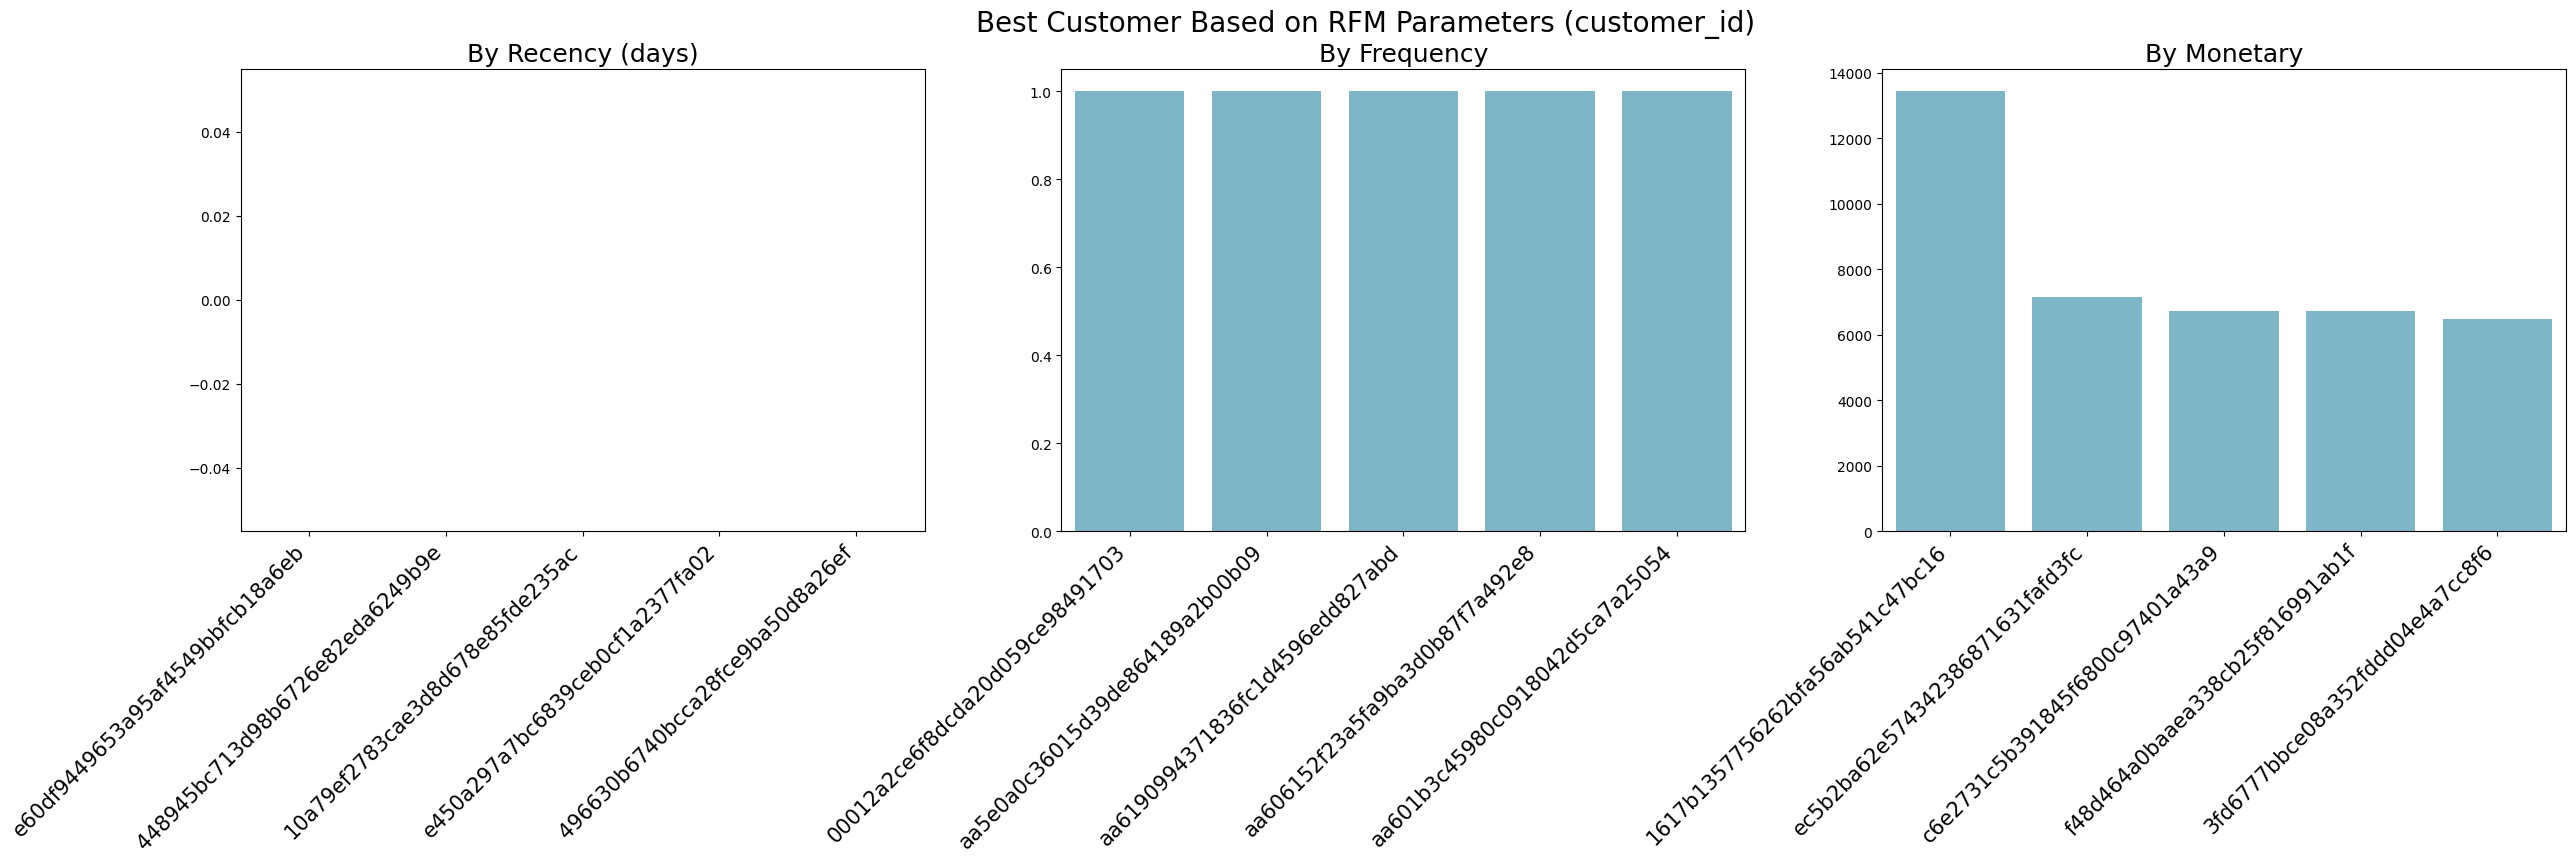

In [69]:
# Membuat subplots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Warna yang digunakan pada barplot
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Barplot untuk Recency
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')  # Memiringkan label

# Barplot untuk Frequency
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')  # Memiringkan label

# Barplot untuk Monetary
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, ha='right')  # Memiringkan label

# Judul keseluruhan
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)

# Menampilkan visualisasi
plt.show()

## Conclusion

- Pertanyaan 1 : Berdasarkan visualisasi di atas, kita dapat melihat bahwa jumlah order terbanyak terjadi pada bulan November 2017. Selain itu, kita juga dapat melihat adanya penurunan jumlah order yang cukup signifikan pada bulan Desember 2017. 
Tentunya penurunan tersebut akan berdampak pada total revenue yang diperoleh perusahaan, sama halnya dengan jumlah order revenue juga mengalami puncak tertinggi pada November 2017 dan kembali mengalami penurunan signifikan pada Desember 2017
- Pertanyaan 2 : Berdasarkan gambar di atas, Anda dapat melihat bahwa produk Cama mesa banho merupakan produk yang paling laris. Kontras dengan hal tersebut, produk Mandarin Seguros e servicos merupakan produk yang paling sedikit terjual.  

In [74]:
all_data.to_csv("all_data.csv", index=False)